In [1]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1 import utils
from scipy.signal import argrelextrema
import matplotlib.patheffects as pe
import re
from matplotlib.image import imread
from PIL import Image

In [3]:
ff1.plotting.setup_mpl()
ff1.Cache.enable_cache('./cache')
pd.options.mode.chained_assignment = None

In [4]:
year, grand_prix, session = 2023, 'Australia', 'Q'

session = ff1.get_session(year, grand_prix, session)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.0.0]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data 

In [5]:
driver_1, driver_2 = 'VER', 'RUS'
# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

# Select the fastest lap
# fastest_driver_1 = laps_driver_1.loc[laps_driver_1['LapNumber'] == 23]
fastest_driver_1 = laps_driver_1.pick_fastest()
# fastest_driver_2 = laps_driver_2.loc[laps_driver_2['LapNumber'] == 23]
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = str(fastest_driver_1['Team'])
team_driver_2 = str(fastest_driver_2['Team'])

In [6]:
# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [8]:
plot_width = 15
plot_height = 15
plot_size = [plot_width, plot_height]
title_font_size = int(2 * plot_height)  # Adjust the 0.15 multiplier to your liking
axis_label_font_size = int(1.5 * plot_height)  # Adjust the 0.1 multiplier to your liking
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = re.sub(r'\W+', '', plot_title.replace("\n", " ")) + ".png"
logo_path = r'C:\Users\getou\Desktop\F1DataVisualization\RCKMG_logo.png'
logo_img = Image.open(logo_path)

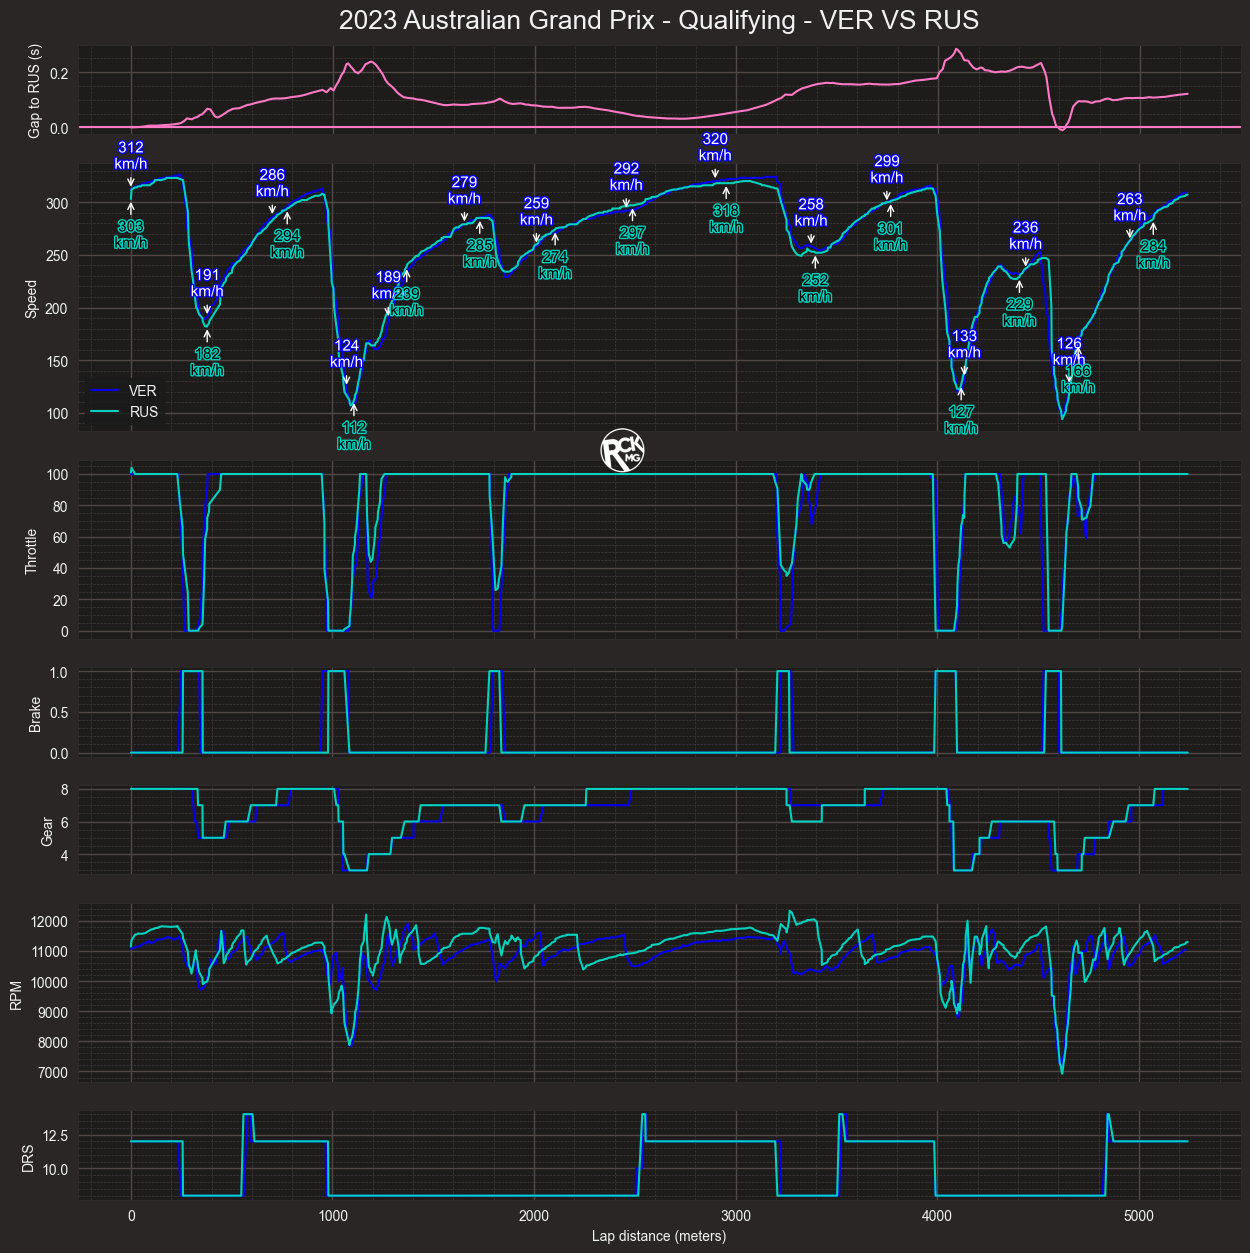

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance'],
      dtype='object')


In [10]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# x_min = 4100
# x_max = x_min+2000

# Set the plot title
ax[0].title.set_text(f'{plot_title}')


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(prop={"size":10})
# Find ever nTH entry in panda DataFrame
every_nTH_entry = telemetry_driver_1.iloc[::41]
every_nTH_entry_alo = telemetry_driver_2.iloc[::41]

# Plot every nTH entry as scatter points on top of the line plot
#ax[1].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Speed'].to_numpy(), marker='o')

# Annotate every nTH entry
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='white', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_driver_1))])
for index, row in every_nTH_entry_alo.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, -35), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_driver_2))])
    
# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

# Define the new width and height for the logo
new_width = 45
new_height = 45
# Resize the logo
logo_resized = logo_img.resize((new_width, new_height))
logo_resized_np = np.array(logo_resized)
logo_x = 600
logo_y = 780
fig.figimage(logo_resized_np, xo=logo_x, yo=logo_y, zorder=1, origin='upper', alpha=1)

# # Smooth the 'Speed' column data using a rolling mean
# window_size = 5  # Adjust this value to control the degree of smoothing
# telemetry_driver_1['Smoothed_Speed'] = telemetry_driver_1['Speed'].rolling(window=window_size, center=True).mean()

# # Define the comparison function for argrelextrema to find local maxima
# comparator = np.greater

# # Find the indices of the local maxima in the 'Smoothed_Speed' column
# local_maxima_indices = argrelextrema(telemetry_driver_1['Smoothed_Speed'].values, comparator)

# # Filter the local maxima indices to keep only the 7 highest maximums
# top_local_maxima_indices = sorted(local_maxima_indices[0], key=lambda x: telemetry_driver_1['Smoothed_Speed'].iloc[x], reverse=True)[:7]

# # Print the indices and values of the 7 local maximums
# for idx, local_max_index in enumerate(top_local_maxima_indices):
#     local_max_value = telemetry_driver_1['Speed'].iloc[local_max_index]
#     print(f"Local Maximum {idx + 1}: Index {local_max_index}, Value {local_max_value}")
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

# for i in range(7):
#     ax[i].set_xlim(left=x_min, right=x_max)
# Store figure
# plt.savefig(plot_filename, dpi=300)
plt.show()
print(telemetry_driver_1.columns)